In [1]:
# import csv
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import seaborn as sns
import numpy as np

In [2]:
df  = pd.read_csv("customerchurn.csv", delimiter=",")
print ("total records : {:,d}".format(df.count()['Churn']))
df.head()

total records : 7,032


,Churn,MonthlyCharges,SeniorCitizen,PaymentMethod,InternetService,tenure,Contract
0,0,29.85,0,Electronic check,DSL,1,Month-to-month
1,0,56.95,0,Mailed check,DSL,34,One year
2,1,53.85,0,Mailed check,DSL,2,Month-to-month
3,0,42.30,0,Bank transfer,DSL,45,One year
4,1,70.70,0,Electronic check,Fiber optic,2,Month-to-month


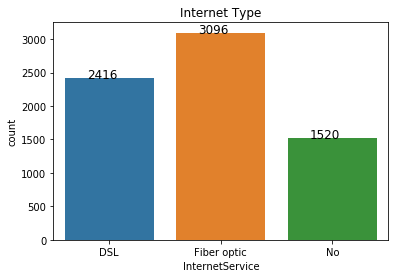

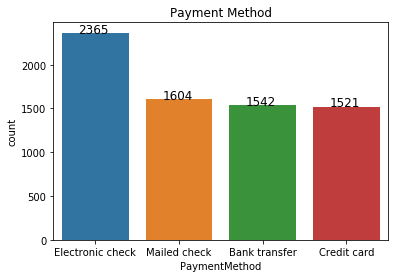

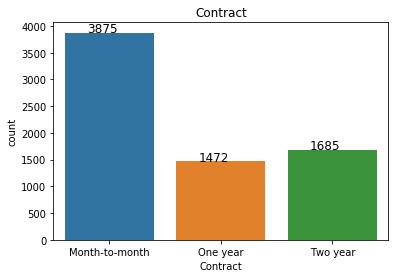

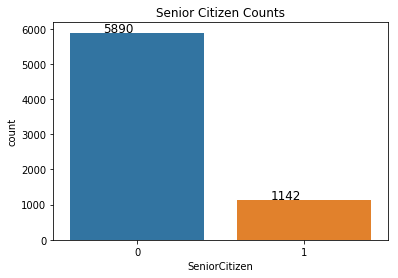

In [3]:
#count of Internet connection
ax = sns.countplot(x='InternetService', data= df )
ax.set_title('Internet Type')
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/4,i.get_height(),s=i.get_height(), fontsize=12)
    
plt.show()

#count of payment method
ax = sns.countplot(x='PaymentMethod', data = df)
ax.set_title('Payment Method')
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/4, i.get_height(), s=i.get_height(), fontsize=12)
plt.show()


#count of types of contract
ax = sns.countplot(x='Contract', data = df)
ax.set_title('Contract')

for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/4, i.get_height()+4, s = i.get_height(), fontsize=12)

plt.show()

#count of types of contract
ax = sns.countplot(x='SeniorCitizen', data = df)
ax.set_title('Senior Citizen Counts')

for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/4, i.get_height()+4, s = i.get_height(), fontsize=12)

plt.show()



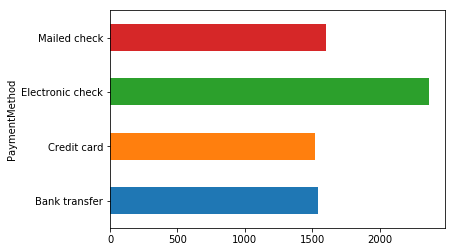

In [4]:
df.groupby(['PaymentMethod']).count()['Churn'].plot(kind='barh')
plt.show()

In [5]:
#encode variables
df['Mon2Mon'] = (df['Contract'] == 'Month-to-month' )*1
df['OneYr'] = (df['Contract'] == 'One year' )* 1
df['TwoYr'] = (df['Contract'] == 'Two year')*1

df['BankTransfer'] = (df['PaymentMethod'] == 'Bank transfer')*1
df['Credit'] = (df['PaymentMethod'] == 'Credit card') * 1
df['Electronic'] = (df['PaymentMethod'] == 'Electronic check') * 1
df['Mailed'] = (df['PaymentMethod'] == 'Mailed check') * 1

df['DSL'] = (df['InternetService'] == 'DSL') * 1
df['Fiber'] = (df['InternetService'] == 'Fiber optic') * 1
df['No'] = (df['InternetService'] == 'No') * 1

tr,te = train_test_split(df,test_size = 0.1)

In [6]:
df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Churn,MonthlyCharges,SeniorCitizen,tenure,Mon2Mon,OneYr,TwoYr,BankTransfer,Credit,Electronic,Mailed,DSL,Fiber,No
Churn,1.0,0.19,0.15,-0.35,0.4,-0.18,-0.3,-0.12,-0.13,0.3,-0.091,-0.12,0.31,-0.23
MonthlyCharges,0.19,1.0,0.22,0.25,0.059,0.0048,-0.073,0.042,0.03,0.27,-0.38,-0.16,0.79,-0.76
SeniorCitizen,0.15,0.22,1.0,0.016,0.14,-0.046,-0.12,-0.016,-0.024,0.17,-0.15,-0.11,0.25,-0.18
tenure,-0.35,0.25,0.016,1.0,-0.65,0.2,0.56,0.24,0.23,-0.21,-0.23,0.014,0.018,-0.038
Mon2Mon,0.4,0.059,0.14,-0.65,1.0,-0.57,-0.62,-0.18,-0.2,0.33,0.0062,-0.065,0.24,-0.22
OneYr,-0.18,0.0048,-0.046,0.2,-0.57,1.0,-0.29,0.058,0.068,-0.11,0.0002,0.047,-0.077,0.038
TwoYr,-0.3,-0.073,-0.12,0.56,-0.62,-0.29,1.0,0.16,0.17,-0.28,-0.0074,0.031,-0.21,0.22
BankTransfer,-0.12,0.042,-0.016,0.24,-0.18,0.058,0.16,1.0,-0.28,-0.38,-0.29,0.025,-0.023,-0.0011
Credit,-0.13,0.03,-0.024,0.23,-0.2,0.068,0.17,-0.28,1.0,-0.37,-0.29,0.051,-0.051,0.0019
Electronic,0.3,0.27,0.17,-0.21,0.33,-0.11,-0.28,-0.38,-0.37,1.0,-0.39,-0.1,0.34,-0.28


In [7]:
F, T = df.groupby('Churn').count()['Contract']

print ("True positive: {}".format(T/(F+T)))
print ("True Negative: {}".format(F/(F+T)))

True positive: 0.26578498293515357
True Negative: 0.7342150170648464


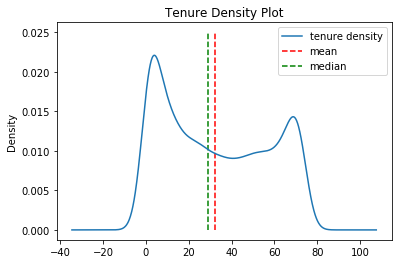

In [8]:
df.tenure.plot(kind='density', title='Tenure Density Plot', label='tenure density')
plt.vlines(x=df.tenure.mean(), ymin= 0, ymax= .025, linestyles='dashed', colors='r', label='mean')
plt.vlines(x=df.tenure.median(), ymin=0, ymax=.025, linestyles='dashed', colors='g', label='median')
plt.legend(loc='upper right')
plt.show()

In [9]:
print ("Skew:     {}".format(df.MonthlyCharges.skew()))
print ("Kurtosis: {}".format(df.MonthlyCharges.kurt()))

Skew:     -0.22210292770166232
Kurtosis: -1.256156424371879


In [10]:
x_column = ['MonthlyCharges',
            'SeniorCitizen',
            'tenure',
            'Mon2Mon',
            'OneYr',
            'TwoYr', 
            'BankTransfer', 
            'Credit', 
            'Electronic', 
            'Mailed', 
            'DSL', 
            'No']
y_column = 'Churn'

train_set, test_set = train_test_split(df[ [y_column] + x_column], 
                                       test_size = 0.1)

y_train = train_set[y_column]
X_train = train_set[x_column]

y_test = test_set[y_column]
X_test = test_set[x_column]
train_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,6328.0,0.266119,0.441962,0.0,0.0,0.00,1.00,1.00
MonthlyCharges,6328.0,64.663938,30.145576,18.4,35.2,70.35,89.85,118.75
SeniorCitizen,6328.0,0.159450,0.366124,0.0,0.0,0.00,0.00,1.00
tenure,6328.0,32.554520,24.607297,1.0,9.0,29.00,56.00,72.00
Mon2Mon,6328.0,0.549779,0.497555,0.0,0.0,1.00,1.00,1.00
OneYr,6328.0,0.207174,0.405314,0.0,0.0,0.00,0.00,1.00
TwoYr,6328.0,0.243047,0.428957,0.0,0.0,0.00,0.00,1.00
BankTransfer,6328.0,0.224399,0.417219,0.0,0.0,0.00,0.00,1.00
Credit,6328.0,0.213496,0.409807,0.0,0.0,0.00,0.00,1.00
Electronic,6328.0,0.332807,0.471255,0.0,0.0,0.00,1.00,1.00


In [11]:
logreg = LogisticRegression()
glm = logreg.fit(X_train, y_train)


results  = glm.predict(X_test)
print ("train test split accuracy: {:.2f}".format(glm.score(X_test, y_test)))
# confusion_matrix(y_test, glm.predict(X_test))

# cross_val_scores = cross_val_score(logreg, df[x_column], df[y_column], cv = 10 )
# print (cross_val_scores)

y_pred = cross_val_predict(logreg, df[x_column], df[y_column], cv = KFold(n_splits=10))
print ("K Fold (10) cross validation accuracy: {:.2f}".format(accuracy_score(df[y_column],y_pred)))

train test split accuracy: 0.78
K Fold (10) cross validation accuracy: 0.80
